In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.classes.action_tests import ActionTest
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.specific.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.specific.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.reports.specific.seduce import first_flirt_timing
from triple_agent.constants.events import SCL5_PICK_MODES, SCL5_VENUE_MODES, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.specific.mission_progress import mission_progress
from triple_agent.reports.specific.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.classes.roles import Roles
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins

In [4]:
player = 'Calvin Schoolidge'

In [5]:
opp_spy_replays = get_parsed_replays(lambda g: g.spy == player)
opp_sniper_replays = get_parsed_replays(lambda g: g.sniper == player)

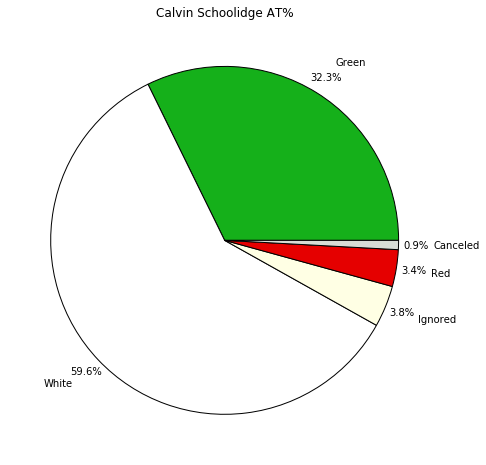

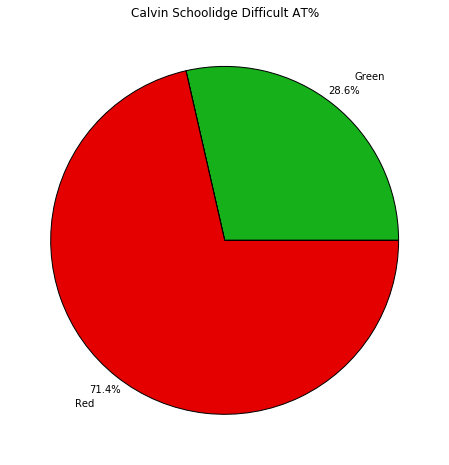

DataPlotProperties(frame=     ActionTest.Green  ActionTest.White  ActionTest.Ignored  ActionTest.Red  \
NaN                 2                 0                   0               5   

     ActionTest.Canceled  
NaN                    0  , stacks_are_categories=True)

In [6]:
action_test_percentages(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} AT%")
)

diff_action_test_percentages(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} Difficult AT%")
)

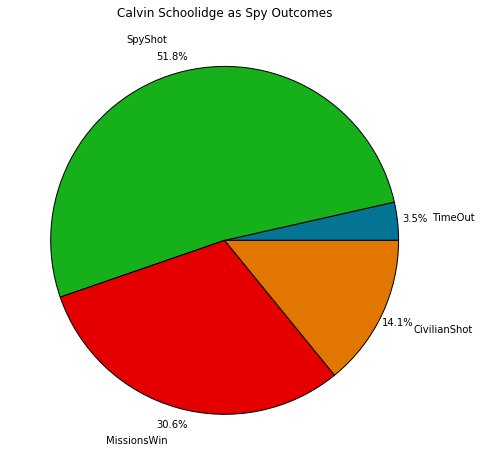

DataPlotProperties(frame=     WinType.TimeOut  WinType.SpyShot  WinType.MissionsWin  \
NaN                3               44                   26   

     WinType.CivilianShot  
NaN                    12  , stacks_are_categories=True)

In [7]:
game_outcomes(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} as Spy Outcomes")
)

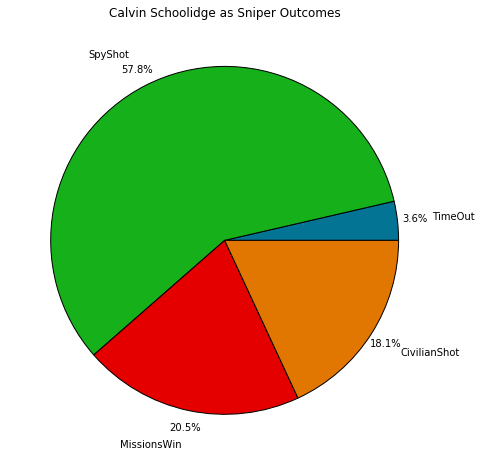

DataPlotProperties(frame=     WinType.TimeOut  WinType.SpyShot  WinType.MissionsWin  \
NaN                3               48                   17   

     WinType.CivilianShot  
NaN                    15  , stacks_are_categories=True)

In [8]:
game_outcomes(
    opp_sniper_replays,
    axis_properties=AxisProperties(title=f"{player} as Sniper Outcomes")
)

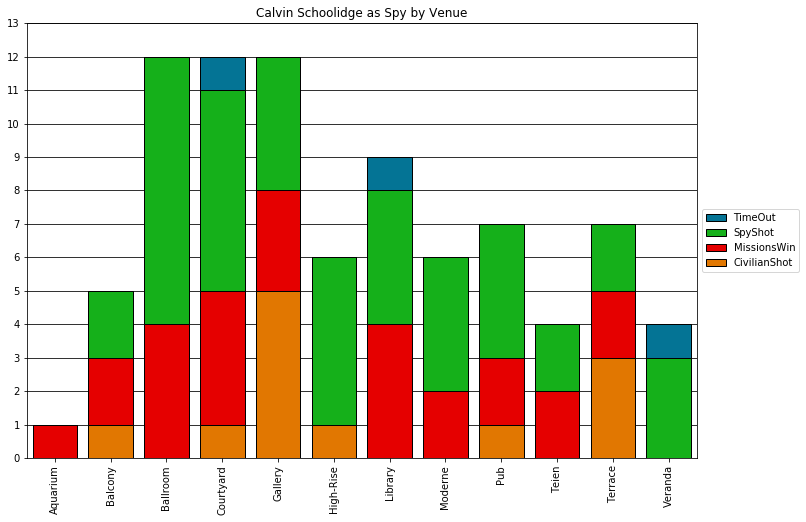

DataPlotProperties(frame=                      Aquarium  Balcony  Ballroom  Courtyard  Gallery  \
WinType.TimeOut              0        0         0          1        0   
WinType.SpyShot              0        2         8          6        4   
WinType.MissionsWin          1        2         4          4        3   
WinType.CivilianShot         0        1         0          1        5   

                      High-Rise  Library  Moderne  Pub  Teien  Terrace  \
WinType.TimeOut               0        1        0    0      0        0   
WinType.SpyShot               5        4        4    4      2        2   
WinType.MissionsWin           0        4        2    2      2        2   
WinType.CivilianShot          1        0        0    1      0        3   

                      Veranda  
WinType.TimeOut             1  
WinType.SpyShot             3  
WinType.MissionsWin         0  
WinType.CivilianShot        0  , stacks_are_categories=False)

In [9]:
game_outcomes(
    opp_spy_replays,
    DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} as Spy by Venue")
)

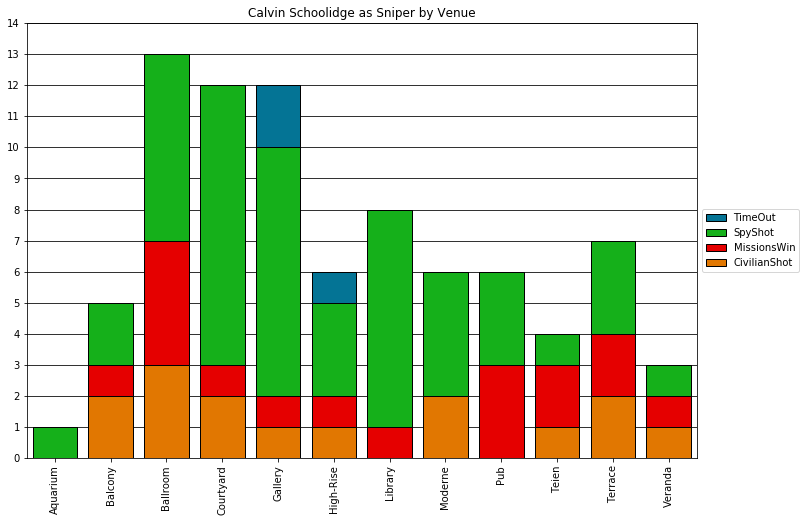

DataPlotProperties(frame=                      Aquarium  Balcony  Ballroom  Courtyard  Gallery  \
WinType.TimeOut              0        0         0          0        2   
WinType.SpyShot              1        2         6          9        8   
WinType.MissionsWin          0        1         4          1        1   
WinType.CivilianShot         0        2         3          2        1   

                      High-Rise  Library  Moderne  Pub  Teien  Terrace  \
WinType.TimeOut               1        0        0    0      0        0   
WinType.SpyShot               3        7        4    3      1        3   
WinType.MissionsWin           1        1        0    3      2        2   
WinType.CivilianShot          1        0        2    0      1        2   

                      Veranda  
WinType.TimeOut             0  
WinType.SpyShot             1  
WinType.MissionsWin         1  
WinType.CivilianShot        1  , stacks_are_categories=False)

In [10]:
game_outcomes(
    opp_sniper_replays,
    DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} as Sniper by Venue")
)

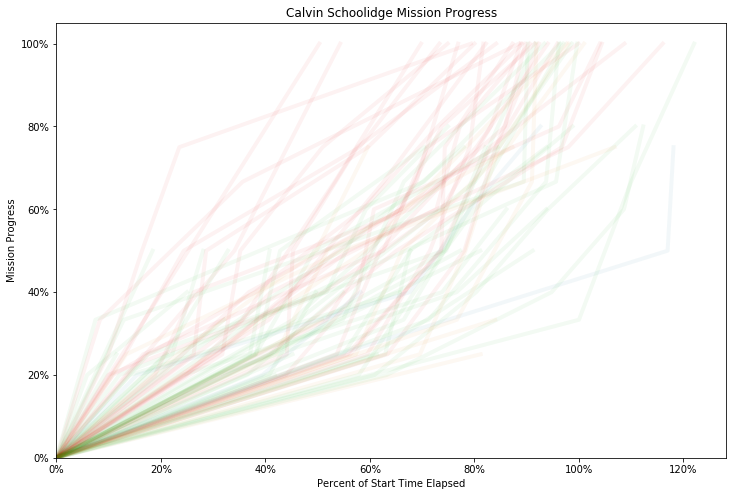

In [11]:
mission_progress(
    opp_spy_replays,
    f"{player} Mission Progress"
)

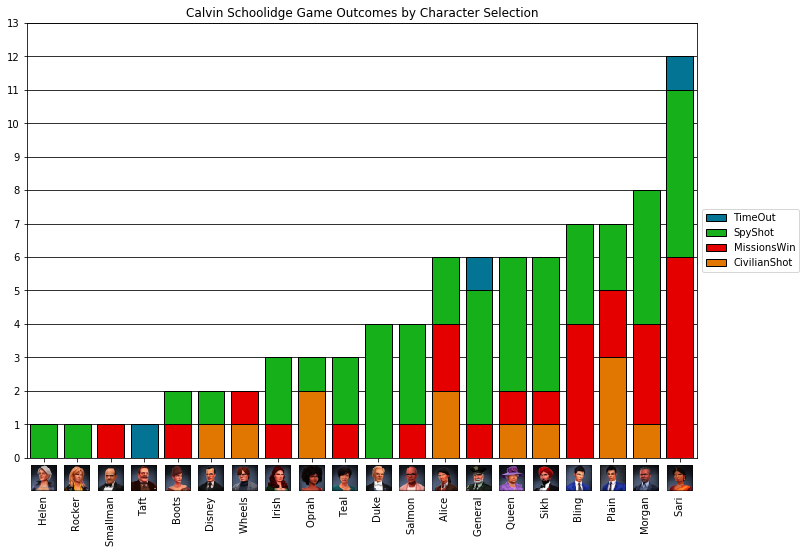

DataPlotProperties(frame=                      Helen  Rocker  Smallman  Taft  Boots  Disney  Wheels  \
WinType.TimeOut           0       0         0     1      0       0       0   
WinType.SpyShot           1       1         0     0      1       1       0   
WinType.MissionsWin       0       0         1     0      1       0       1   
WinType.CivilianShot      0       0         0     0      0       1       1   

                      Irish  Oprah  Teal  Duke  Salmon  Alice  General  Queen  \
WinType.TimeOut           0      0     0     0       0      0        1      0   
WinType.SpyShot           2      1     2     4       3      2        4      4   
WinType.MissionsWin       1      0     1     0       1      2        1      1   
WinType.CivilianShot      0      2     0     0       0      2        0      1   

                      Sikh  Bling  Plain  Morgan  Sari  
WinType.TimeOut          0      0      0       0     1  
WinType.SpyShot          4      3      2       4     5  
WinType

In [12]:
game_outcomes(
    opp_spy_replays,
    DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sum,
    ),
    axis_properties=AxisProperties(title=f"{player} Game Outcomes by Character Selection",x_axis_portrait=True)
)

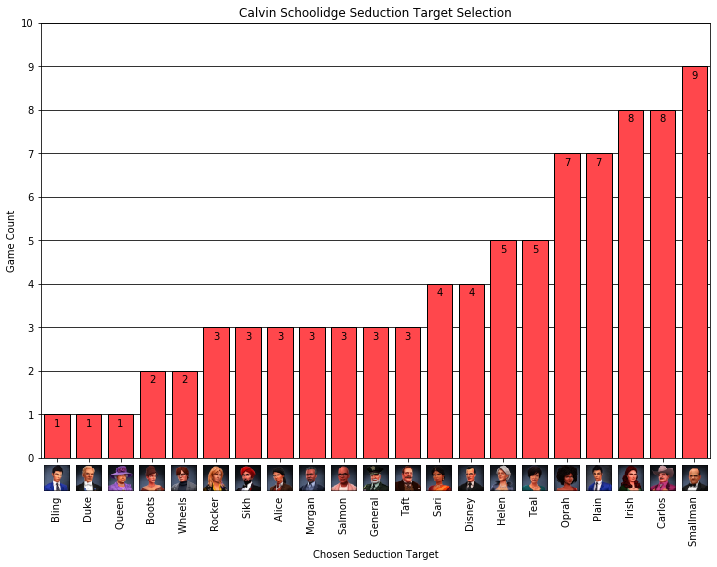

DataPlotProperties(frame=     Bling  Duke  Queen  Boots  Wheels  Rocker  Sikh  Alice  Morgan  Salmon  \
NaN      1     1      1      2       2       3     3      3       3       3   

     ...  Taft  Sari  Disney  Helen  Teal  Oprah  Plain  Irish  Carlos  \
NaN  ...     3     4       4      5     5      7      7      8       8   

     Smallman  
NaN         9  

[1 rows x 21 columns], stacks_are_categories=True)

In [13]:
st_selection(
    opp_spy_replays,
    axis_properties = AxisProperties(
        title=f"{player} Seduction Target Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Seduction Target",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

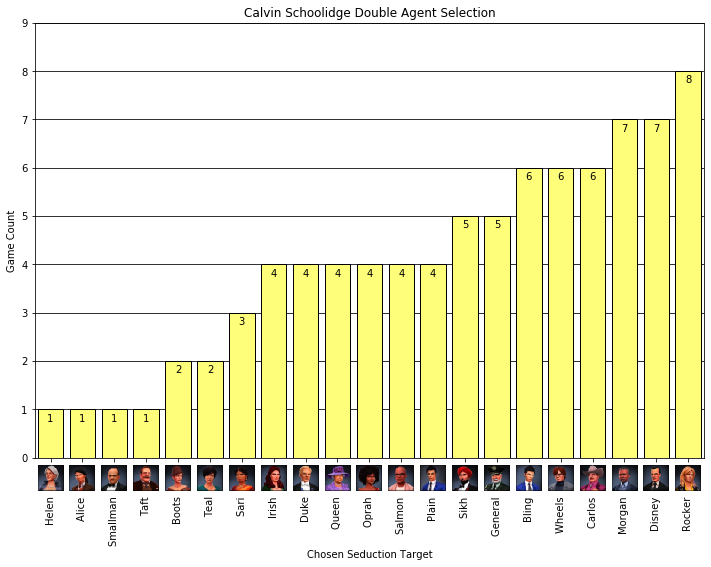

DataPlotProperties(frame=     Helen  Alice  Smallman  Taft  Boots  Teal  Sari  Irish  Duke  Queen  ...  \
NaN      1      1         1     1      2     2     3      4     4      4  ...   

     Salmon  Plain  Sikh  General  Bling  Wheels  Carlos  Morgan  Disney  \
NaN       4      4     5        5      6       6       6       7       7   

     Rocker  
NaN       8  

[1 rows x 21 columns], stacks_are_categories=True)

In [14]:
double_agent_selection(
    opp_spy_replays,
    axis_properties = AxisProperties(
        title=f"{player} Double Agent Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Seduction Target",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

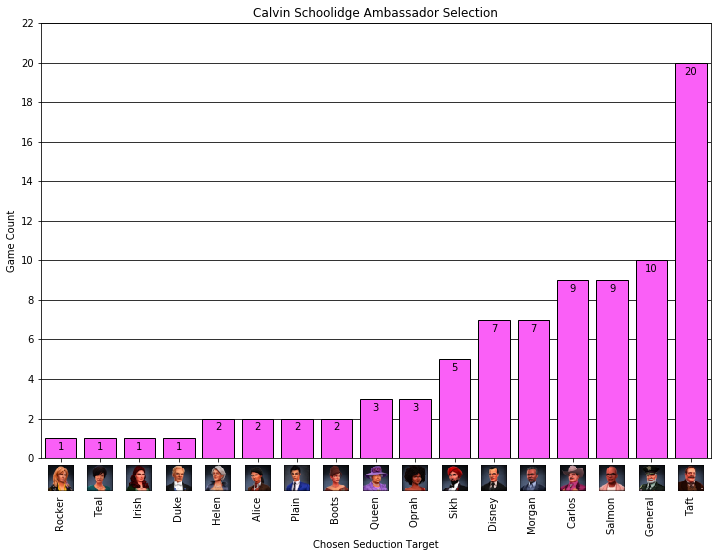

DataPlotProperties(frame=     Rocker  Teal  Irish  Duke  Helen  Alice  Plain  Boots  Queen  Oprah  \
NaN       1     1      1     1      2      2      2      2      3      3   

     Sikh  Disney  Morgan  Carlos  Salmon  General  Taft  
NaN     5       7       7       9       9       10    20  , stacks_are_categories=True)

In [15]:
amba_selection(
    opp_spy_replays,
    axis_properties = AxisProperties(
        title=f"{player} Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Seduction Target",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

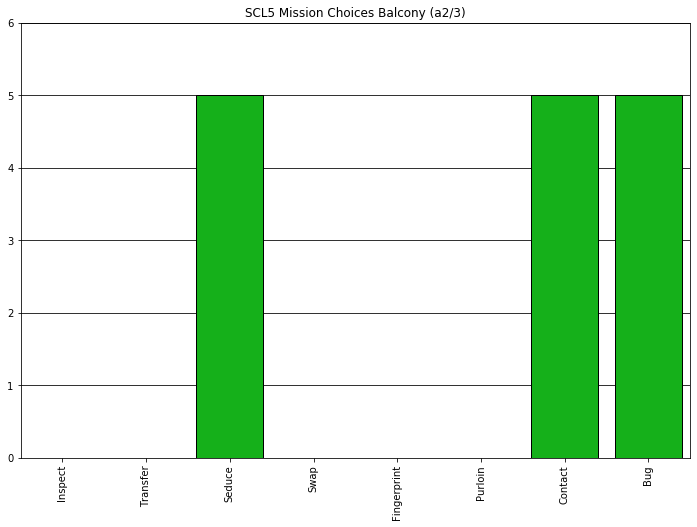

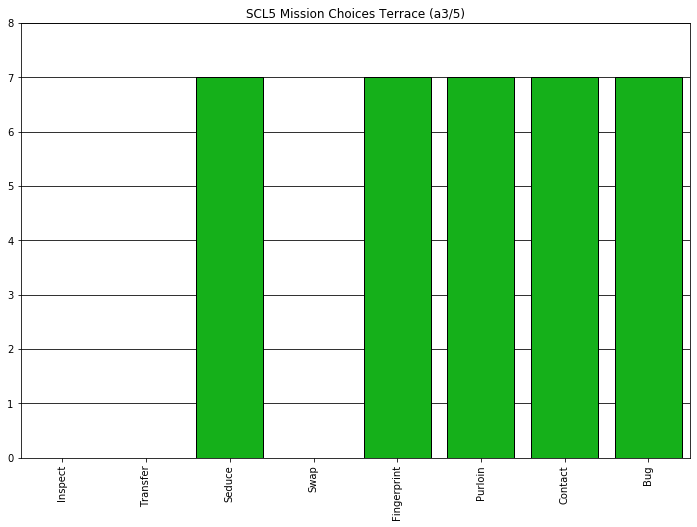

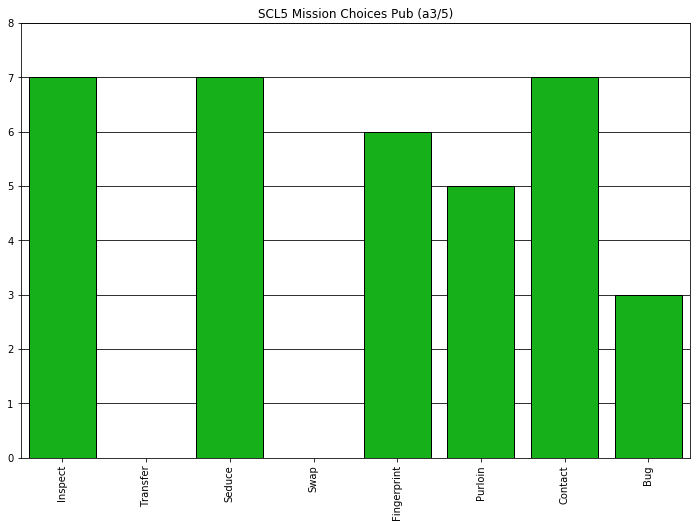

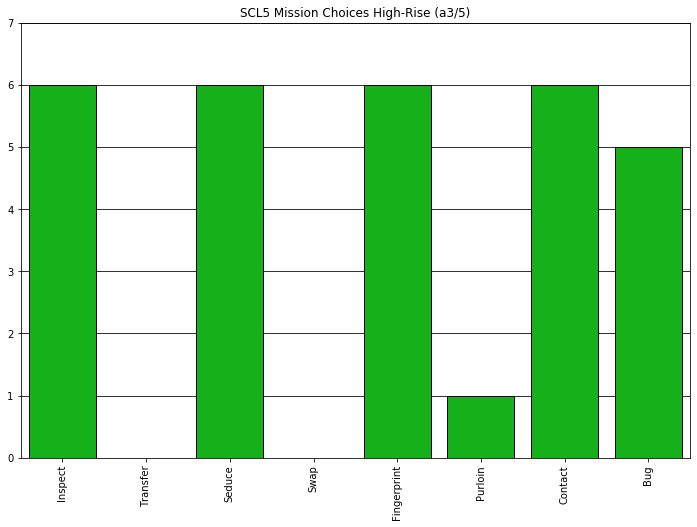

In [16]:
for venue, mode in SCL5_PICK_MODES.items():
    venue_games = filter(lambda g: g.venue==venue, opp_spy_replays)
    
    mission_choices(
        venue_games,
        axis_properties=AxisProperties(title=f"SCL5 Mission Choices {venue} ({mode})",force_bar=True)
    )

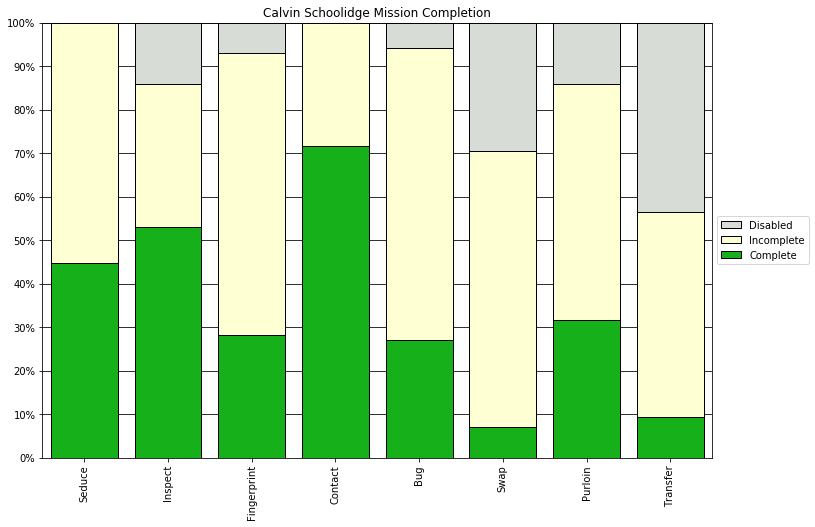

In [17]:
mission_completion(opp_spy_replays, f"{player} Mission Completion")

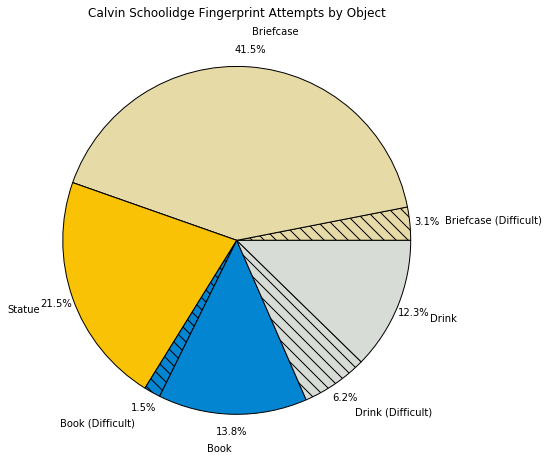

DataPlotProperties(frame=     (TimelineCategory.Briefcase, True)  (TimelineCategory.Briefcase, False)  \
NaN                                   2                                   27   

     (TimelineCategory.Statues, True)  (TimelineCategory.Statues, False)  \
NaN                                 0                                 14   

     (TimelineCategory.Books, True)  (TimelineCategory.Books, False)  \
NaN                               1                                9   

     (TimelineCategory.Drinks, True)  (TimelineCategory.Drinks, False)  
NaN                                4                                 8  , stacks_are_categories=True)

In [18]:
attempted_fingerprint_sources(
    opp_spy_replays, 
    axis_properties=AxisProperties(title=f"{player} Fingerprint Attempts by Object")
)

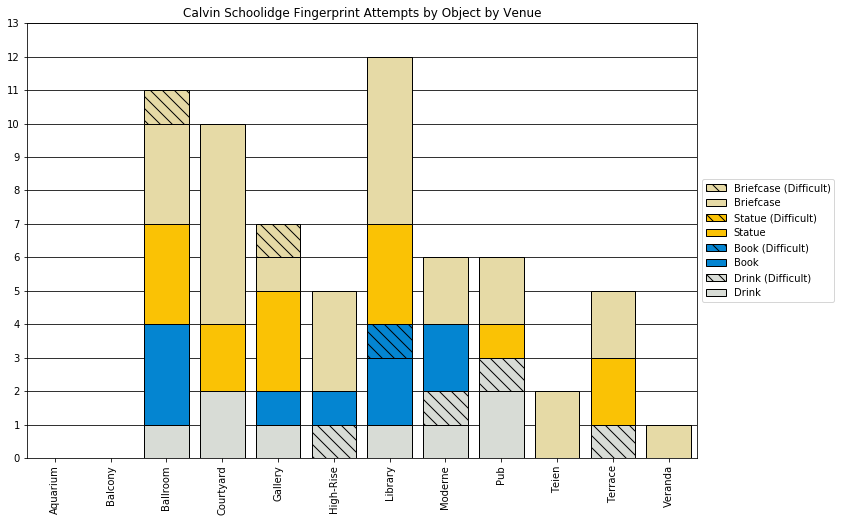

DataPlotProperties(frame=                                     Aquarium  Balcony  Ballroom  Courtyard  \
(TimelineCategory.Briefcase, True)          0        0         1          0   
(TimelineCategory.Briefcase, False)         0        0         3          6   
(TimelineCategory.Statues, True)            0        0         0          0   
(TimelineCategory.Statues, False)           0        0         3          2   
(TimelineCategory.Books, True)              0        0         0          0   
(TimelineCategory.Books, False)             0        0         3          0   
(TimelineCategory.Drinks, True)             0        0         0          0   
(TimelineCategory.Drinks, False)            0        0         1          2   

                                     Gallery  High-Rise  Library  Moderne  \
(TimelineCategory.Briefcase, True)         1          0        0        0   
(TimelineCategory.Briefcase, False)        1          3        5        2   
(TimelineCategory.Statues, True)

In [19]:
attempted_fingerprint_sources(
    opp_spy_replays, 
    data_query=DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} Fingerprint Attempts by Object by Venue")
)

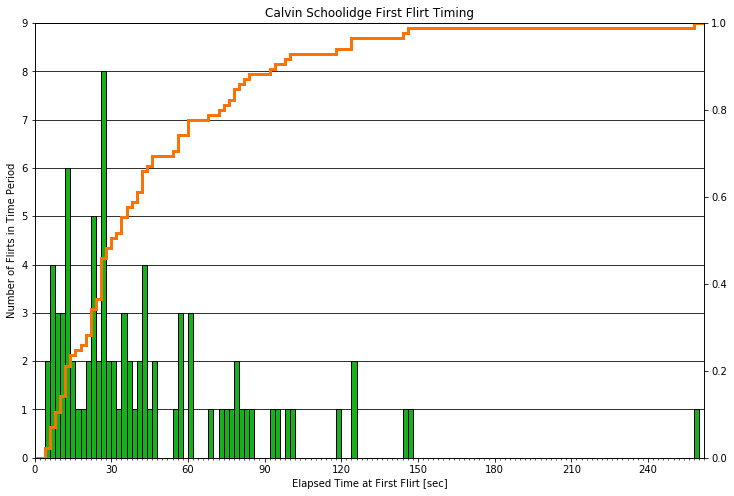

In [20]:
first_flirt_timing(opp_spy_replays, f"{player} First Flirt Timing")

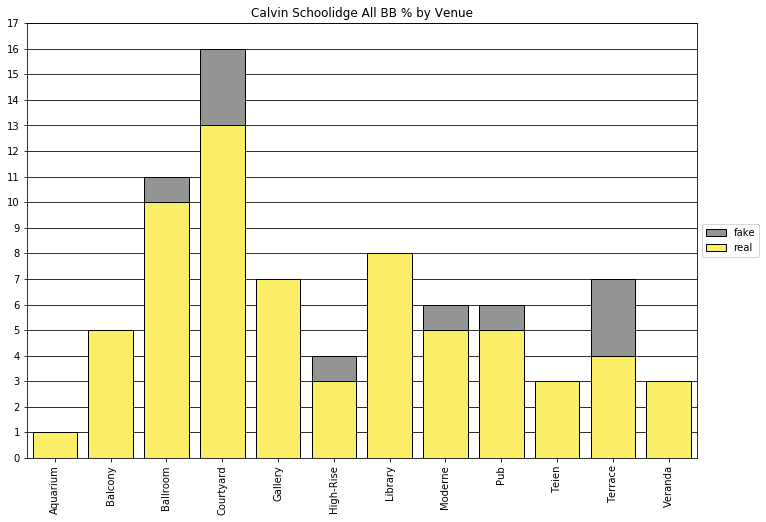

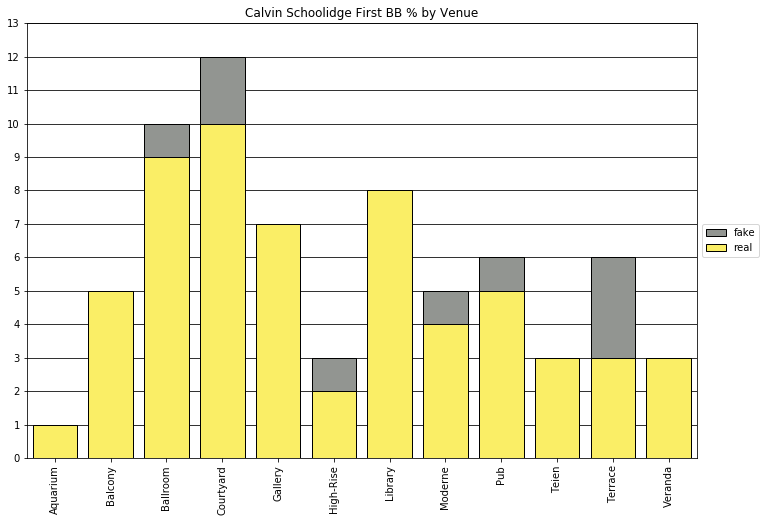

DataPlotProperties(frame=      Aquarium  Balcony  Ballroom  Courtyard  Gallery  High-Rise  Library  \
fake         0        0         1          2        0          1        0   
real         1        5         9         10        7          2        8   

      Moderne  Pub  Teien  Terrace  Veranda  
fake        1    1      0        3        0  
real        4    5      3        3        3  , stacks_are_categories=False)

In [21]:
all_banana_bread_percentages(
    opp_spy_replays,
    data_query=DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} All BB % by Venue")
)

first_banana_bread_percentages(
    opp_spy_replays,
    data_query=DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} First BB % by Venue")
)

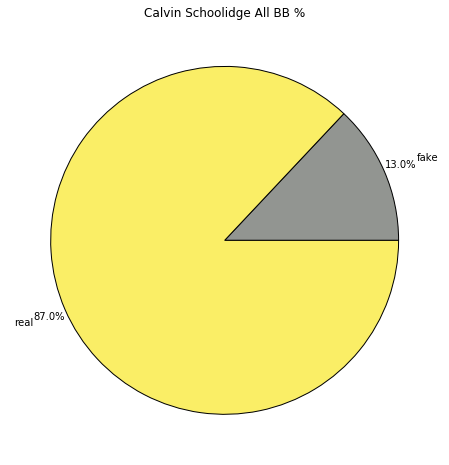

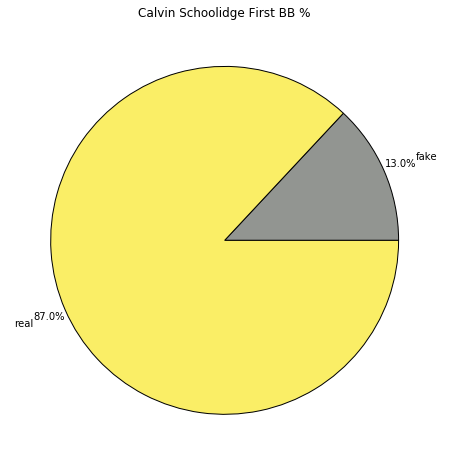

DataPlotProperties(frame=     fake  real
NaN     9    60, stacks_are_categories=True)

In [22]:
all_banana_bread_percentages(opp_spy_replays, axis_properties=AxisProperties(title=f"{player} All BB %"))
first_banana_bread_percentages(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} First BB %")
)

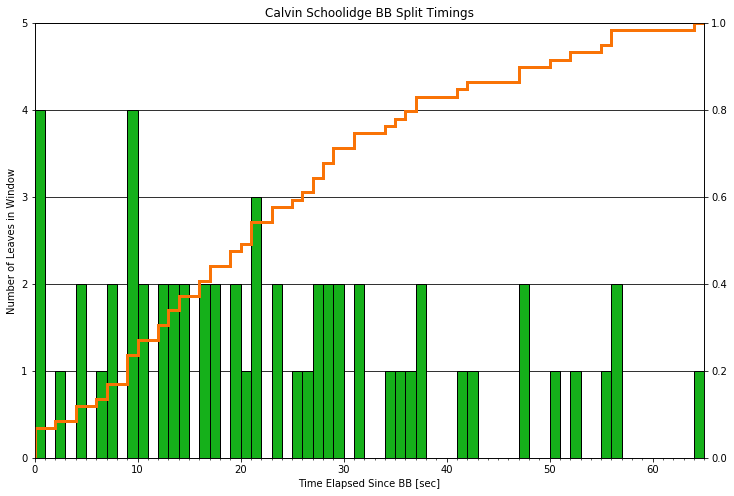

In [23]:
banana_split(opp_spy_replays, f"{player} BB Split Timings")

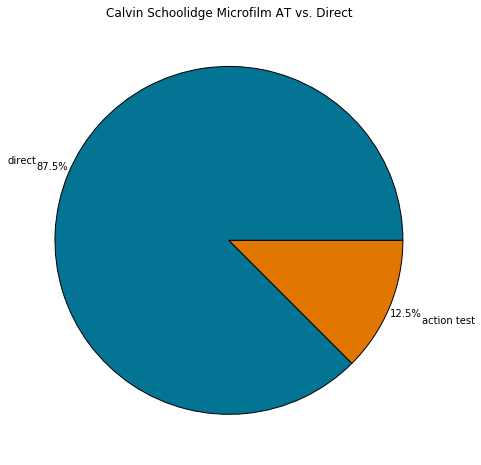

DataPlotProperties(frame=     direct  action test
NaN       7            1, stacks_are_categories=True)

In [24]:
at_or_direct_mf(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} Microfilm AT vs. Direct")
)

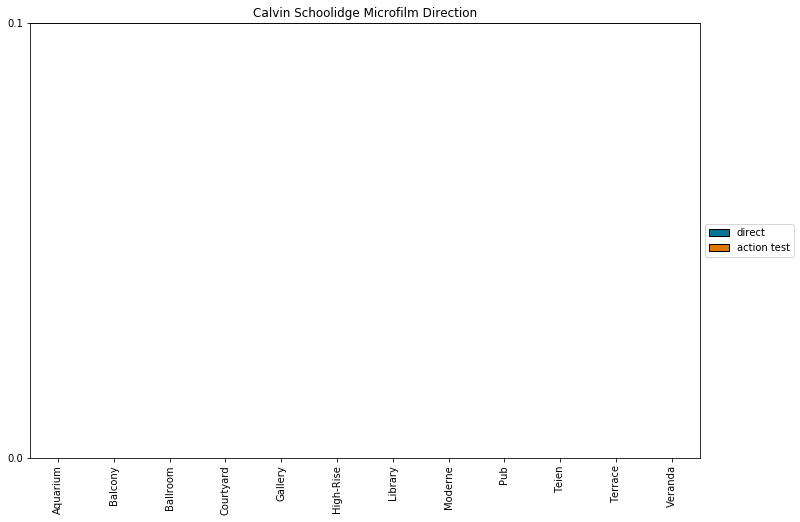

DataPlotProperties(frame=             Aquarium  Balcony  Ballroom  Courtyard  Gallery  High-Rise  \
direct              0        0         0          0        0          0   
action test         0        0         0          0        0          0   

             Library  Moderne  Pub  Teien  Terrace  Veranda  
direct             0        0    0      0        0        0  
action test        0        0    0      0        0        0  , stacks_are_categories=False)

In [25]:
microfilm_direction(
    opp_spy_replays,
    DataQueryProperties(groupby=lambda g: g.venue),
    AxisProperties(title=f"{player} Microfilm Direction"),
)

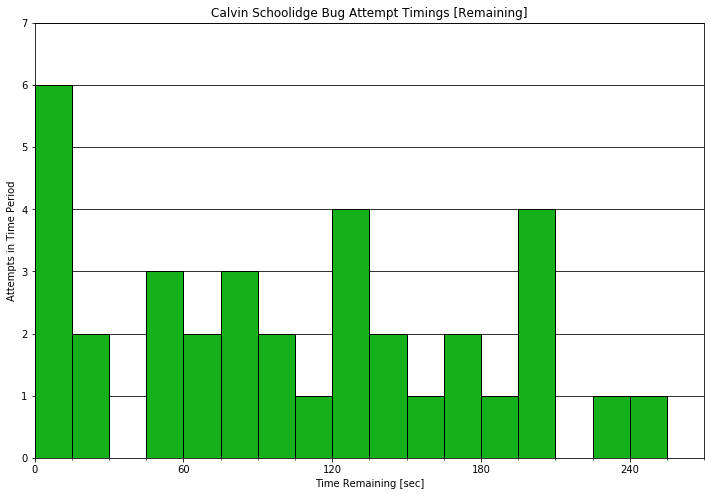

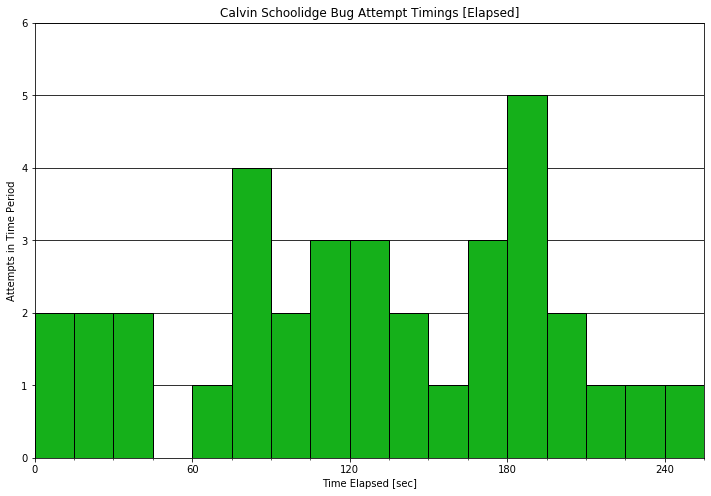

In [26]:
bug_attempt_timings(opp_spy_replays, f"{player} Bug Attempt Timings")

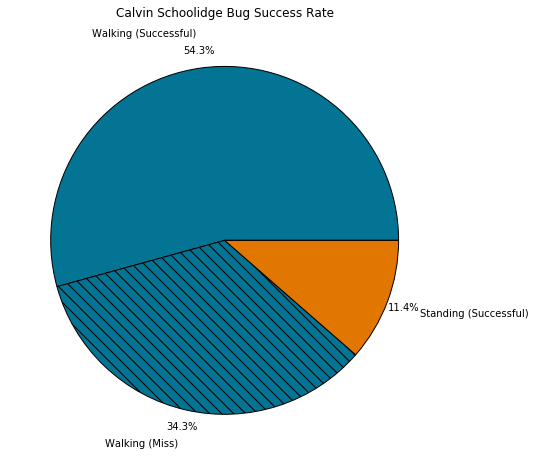

DataPlotProperties(frame=     (Walking, True)  (Walking, False)  (Standing, True)  (Standing, False)
NaN               19                12                 4                  0, stacks_are_categories=True)

In [27]:
bug_success_rate(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} Bug Success Rate"),
)

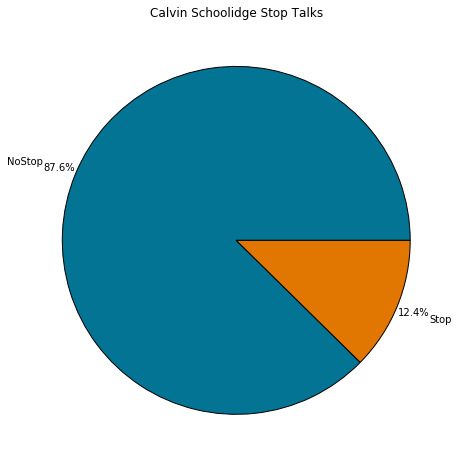

DataPlotProperties(frame=     NoStop  Stop
NaN      85    12, stacks_are_categories=True)

In [28]:
stop_talk_in_game_percentage(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} Stop Talks")
)

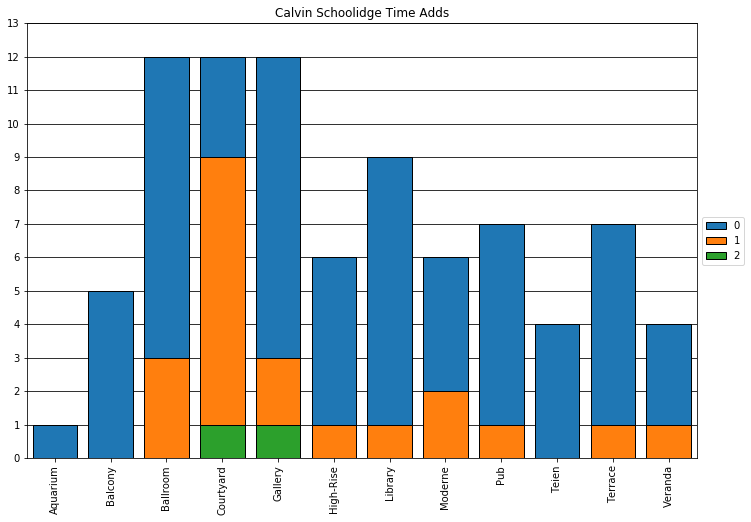

DataPlotProperties(frame=   Aquarium  Balcony  Ballroom  Courtyard  Gallery  High-Rise  Library  \
0         1        5         9          3        9          5        8   
1         0        0         3          8        2          1        1   
2         0        0         0          1        1          0        0   

   Moderne  Pub  Teien  Terrace  Veranda  
0        4    6      4        6        3  
1        2    1      0        1        1  
2        0    0      0        0        0  , stacks_are_categories=False)

In [29]:
time_add_times_per_game(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} Time Adds"),
    data_query=DataQueryProperties(groupby=lambda g: g.venue, reverse_primary_order=True)
)

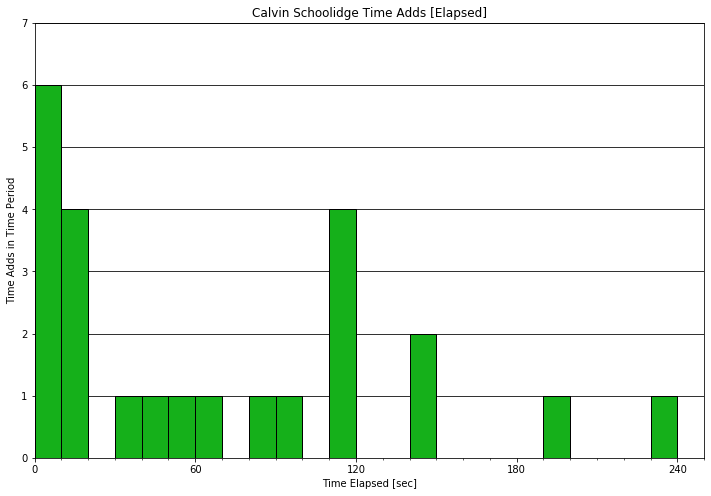

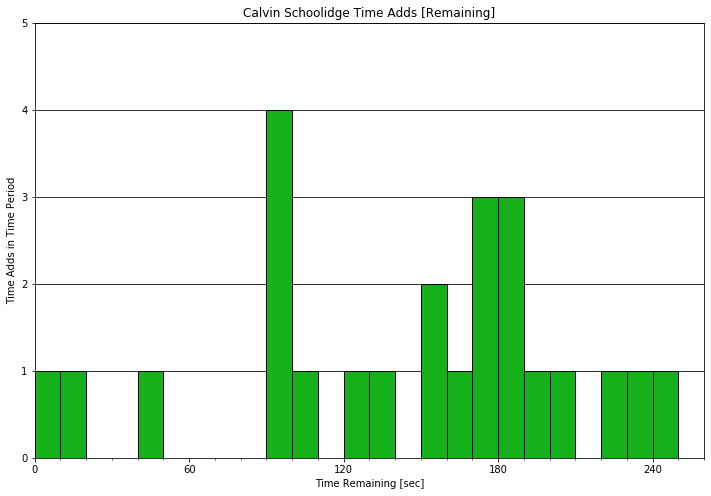

In [30]:
time_add_times(opp_spy_replays, f"{player} Time Adds")